# Домашнее задание к лекции 4.2 «Визуализация данных» 
В файле должны быть сохранены результаты запуска на тестовых данных.

Дано: данные о популярности имен для новорожденных. Добавлять исходные данные в репозиторий с выполненным заданием необязательно, но в блокноте необходимо выделить путь к файлам в отдельную переменную, которую легко поменять.

1 - Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

2 - Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

3 - Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

4 - Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%matplotlib inline

1 - Построить график изменения количества имен Ruth и Robert с 1900 по 2000.

In [48]:
# Получим путь до папки с данными
WORKDIR = f'{os.getcwd()}/names/'
WORKDIR

'/Users/aleksejkonotop/hw_py_16/py_16_hw_4.2/names/'

In [49]:
names_by_year = {}
for year in range(1900, 2001):
    names_by_year[year] = pd.read_csv('{0}/yob{1}.txt'.format(WORKDIR, year), 
                                      names=['Name', 'Gender', 'Count']
                                     )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
# names_all.head(10)

In [50]:
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics.head(10)

Count
Year Name          
1900 Aaron      103
     Abbie      112
     Abby         7
     Abe         56
     Abel        15
     Abigail     14
     Abner       21
     Abraham    100
     Abram       18
     Abron        5

In [51]:
# Оценим изменения кол-ва конкретных имен:
name_dynamics.query('Name == ["Ruth", "Robert"]')

Count
Year Name         
1900 Robert   3845
     Ruth     4781
1901 Robert   2559
     Ruth     3989
1902 Robert   3201
     Ruth     4401
1903 Robert   3057
     Ruth     4531
1904 Robert   3427
     Ruth     4915
1905 Robert   3431
     Ruth     5088
1906 Robert   3651
     Ruth     5159
1907 Robert   4042
     Ruth     5588
1908 Robert   4245
     Ruth     6200
1909 Robert   4588
     Ruth     6526
1910 Robert   5638
     Ruth     7247
1911 Robert   6565
     Ruth     8032
1912 Robert  12901
     Ruth    11323
1913 Robert  15755
     Ruth    12642
1914 Robert  21268
     Ruth    15885
...            ...
1986 Robert  31582
     Ruth     1096
1987 Robert  30447
     Ruth     1040
1988 Robert  30495
     Ruth     1012
1989 Robert  30190
     Ruth      997
1990 Robert  28980
     Ruth      913
1991 Robert  26905
     Ruth      990
1992 Robert  24147
     Ruth      853
1993 Robert  22513
     Ruth      863
1994 Robert  20607
     Ruth      880
1995 Robert  18627
     Ruth      858
1996 Robert  17711
     Ruth      801
1997 Robert  16340
     Ruth      856
1998 Robert  15552
     Ruth      850
1999 Robert  14563
     Ruth      870
2000 Robert  13760
     Ruth      903

[202 rows x 1 columns]

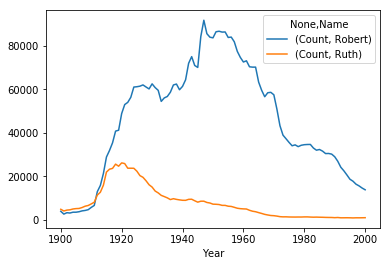

In [52]:
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot()

2 - Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

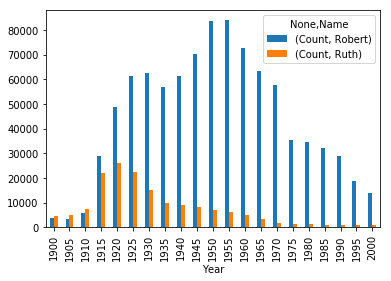

In [53]:
names_by_year = {}
for year in range(1900, 2001, 5):
    names_by_year[year] = pd.read_csv('{0}/yob{1}.txt'.format(WORKDIR, year), 
                                      names=['Name', 'Gender', 'Count']
                                     )
names_all = pd.concat(names_by_year, names=['Year', 'Pos'])
# names_all.head(10)
name_dynamics = names_all.groupby([names_all.index.get_level_values(0), 'Name']).sum()
name_dynamics.query('Name == ["Ruth", "Robert"]').unstack('Name').plot.bar()

3 - Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

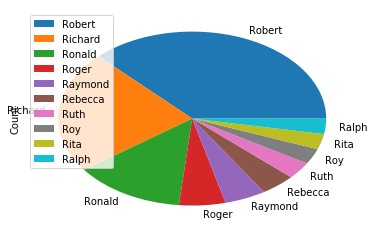

In [54]:
names_1950 = pd.read_csv('{0}/yob{1}.txt'.format(WORKDIR, 1950), 
                                      names=['Name', 'Gender', 'Count'])
names_start_R = names_1950[(names_1950.Name.str.startswith("R"))]
names_for_pie = names_start_R.groupby('Name').sum().sort_values(by='Count', ascending=False).head(10)
names_for_pie.plot.pie(y="Count")

4 - Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. 

Т.е. необходимо сложить всю статистику с 1900 до 2000, 
сгруппировать по именам, 
посчитать количество согласных букв в каждом имени и 
вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [55]:
# Для начала напишем функцию подсчета согласных букв в слове
def count_vowel_letters(word):
    vowels = set("aeiouy")
    
    return sum(letter.lower() in vowels for letter in word)


word = "OoOo"
print('Гласных букв в слове {0}: {1} шт.'.format(word, count_vowel_letters(word)))

Гласных букв в слове OoOo: 4 шт.
